# Analyza dat

Toto je jednoducha ukazka toho, jak analyzovat data, ktera jsme ziskali z nasi virtualni skoly.

## Jak To Funguje

Budeme pouzivat Python (https://python.cz/), coz je velmi popularni programovaci jazyk. Existuje k nemu velke mnozstvi knihoven, takze i velmi slozite veci se daji udelat na par radcich.

Kdyz zmacknes Shift + Enter, tak se provedou vsechny prikazy, ktere jsou v dane bunce. Kdyz bezi vypocet, tak je u bunky misto cisla *. Muzes si to vyzkouset na nasledujici bunce.

In [2]:
# zkus zmacknout Shift + Enter, pripadne kliknout na Run v menu nahore.
import time
time.sleep(3)

print("Faktorial")
def faktorial(n):
    if n <= 0:
        return 1
    else:
        return n * faktorial(n - 1)
    
for i in range(10):
    print("%3d! = %10d" % (i, faktorial(i)))
    time.sleep(0.3)
    
# hash na zacatku radku je komentar
# zakomentovane prikazy se neprovadi
# zkus zakomentovat vsechny radky s prikazem sleep

# nemusis kod smazat, staci ho zakomentovat :)

Faktorial
  0! =          1
  1! =          1
  2! =          2
  3! =          6
  4! =         24
  5! =        120
  6! =        720
  7! =       5040
  8! =      40320
  9! =     362880


In [3]:
3 + 2

5

In [4]:
5 ** 2

25

In [5]:
# V Pythonu muzeme pouzit jednu hodnotu
3

3

In [6]:
# Nebo take pole nekolika hodnot
[1, 1, 2, 6, 24, 120]

[1, 1, 2, 6, 24, 120]

## Analyza nasimulovanych dat

Ted uz rozumis Pythonu a dokazes spoustet prikazy, takze se muzeme pustit do skutecne prace.

Data, ktera budeme pouzivat v tomto prikladu pochazi ze simulace. Pokud si chces prohlednout, muzes se podivat na jeji zdrojovy kod - https://github.com/martin-majlis/ms-opendata-simulation

Tato simulace je velmi jednoducha. Na skolu sviti slunce, fouka vitra a okolo jezdi auta. Do skoly chodi take studenti, kteri maji pravidelny rozvrh. Studenti se podle rozvrhu presouvaji mezi jednotlivymi ucebnami.

Kazdy student produkuje teplo a hluk. Ve skole neni zadne topeni ani klimatizace.

In [7]:
# stahni si nasimulovana data
! curl 'https://raw.githubusercontent.com/martin-majlis/ms-opendata-simulation/master/preprocessed/with-derived.csv?v=3' > sim-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7011k  100 7011k    0     0  2556k      0  0:00:02  0:00:02 --:--:-- 2556k


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Nacteme data
data = pd.read_csv('sim-data.csv')

# Nastavime nektere sloupecky jako kategoricke
data["D_DayOfWeek"] = data["D_DayOfWeek"].astype("category")
data["D_HourOfDay"] = data["D_HourOfDay"].astype("category")
data["D_DayHour"] = data["D_DayHour"].astype("category")

# data_active obsahuje pouze data, kdy jsou ve tride nejaci studenti
data_active = data[data['D_StudentsTotal-Count'] > 0]

### Prozkoumani dat

Nez zacneme s daty skutecne pracovat, je dobre je nejdrive prozkoumat.
Je dobre zjistit, jake sloupecky/feature dataset obsahuje, jakych hodnot nabyvaji, a jake jsou mezi nimi vztahy.

In [10]:
# Muzeme se podivat na nazvy jednotlivych sloupcu
list(data.columns)

['TS',
 'Birds-CC-Count',
 'Birds-JJ-Count',
 'Birds-JV-Count',
 'Birds-JZ-Count',
 'Birds-SS-Count',
 'Birds-SV-Count',
 'Birds-SZ-Count',
 'Birds-VV-Count',
 'Birds-ZZ-Count',
 'D-Birds-CC-Count-1',
 'D-Birds-CC-Count-3',
 'D-Birds-CC-Count-6',
 'D-Birds-JJ-Count-1',
 'D-Birds-JJ-Count-3',
 'D-Birds-JJ-Count-6',
 'D-Birds-JV-Count-1',
 'D-Birds-JV-Count-3',
 'D-Birds-JV-Count-6',
 'D-Birds-JZ-Count-1',
 'D-Birds-JZ-Count-3',
 'D-Birds-JZ-Count-6',
 'D-Birds-SS-Count-1',
 'D-Birds-SS-Count-3',
 'D-Birds-SS-Count-6',
 'D-Birds-SV-Count-1',
 'D-Birds-SV-Count-3',
 'D-Birds-SV-Count-6',
 'D-Birds-SZ-Count-1',
 'D-Birds-SZ-Count-3',
 'D-Birds-SZ-Count-6',
 'D-Birds-VV-Count-1',
 'D-Birds-VV-Count-3',
 'D-Birds-VV-Count-6',
 'D-Birds-ZZ-Count-1',
 'D-Birds-ZZ-Count-3',
 'D-Birds-ZZ-Count-6',
 'D-D_BirdsTotal-Count-1',
 'D-D_BirdsTotal-Count-3',
 'D-D_BirdsTotal-Count-6',
 'D-D_StudentsTotal-Count-1',
 'D-D_StudentsTotal-Count-3',
 'D-D_StudentsTotal-Count-6',
 'D-Noise-CC-Noise-1',
 'D-Noi

In [11]:
# Muzeme se podivat na vlastnosti jednotlivych sloupcu
data.describe()

,Birds-CC-Count,Birds-JJ-Count,Birds-JV-Count,Birds-JZ-Count,Birds-SS-Count,Birds-SV-Count,Birds-SZ-Count,Birds-VV-Count,Birds-ZZ-Count,D-Birds-CC-Count-1,...,Temp-JJ-Temperature,Temp-JV-Temperature,Temp-JZ-Temperature,Temp-SS-Temperature,Temp-SV-Temperature,Temp-SZ-Temperature,Temp-VV-Temperature,Temp-ZZ-Temperature,Wind-Direction,Wind-Speed
count,3360.0,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3359.0,...,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000
mean,0.0,16.203869,24.317857,7.777976,7.973214,11.982440,3.637798,16.283929,8.106845,0.0,...,6.303835,6.290631,6.784620,2.319261,2.557732,2.724771,4.007116,3.843865,244.380983,221.062184
std,0.0,7.336333,10.954268,3.774074,3.387699,5.484449,1.843392,6.888236,3.357202,0.0,...,13.968681,13.807704,14.521463,11.775087,11.952723,12.041953,12.520883,12.441510,73.352359,109.602646
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-17.675279,-17.675279,-17.675279,-17.675279,-17.675279,-17.675279,-17.675279,-17.675279,0.175344,0.000000
25%,0.0,13.000000,19.000000,6.000000,6.000000,10.000000,3.000000,13.000000,7.000000,0.0,...,-4.292837,-4.245774,-4.240191,-5.770258,-5.755846,-5.675163,-4.928737,-4.917071,211.644903,115.873356
50%,0.0,18.000000,27.000000,9.000000,9.000000,13.000000,4.000000,18.000000,9.000000,0.0,...,3.186421,3.357437,3.186421,-0.541624,-0.414428,-0.320056,0.903147,0.774898,251.303109,250.355277
75%,0.0,21.000000,32.000000,10.000000,10.000000,16.000000,5.000000,21.000000,10.000000,0.0,...,14.401366,14.492615,15.601453,6.445958,6.957702,7.431402,9.507065,9.301214,294.608865,312.022306
max,0.0,32.000000,52.000000,17.000000,17.000000,28.000000,8.000000,35.000000,17.000000,0.0,...,66.756835,63.345087,68.557803,56.103983,53.675700,55.413152,64.786609,59.284208,359.506799,438.862089


In [12]:
# A ted na vlastnosti dat, kdyz se ve skole vyucuje
# Ktere hodnoty se zmenily a proc?
data_active.describe()

,Birds-CC-Count,Birds-JJ-Count,Birds-JV-Count,Birds-JZ-Count,Birds-SS-Count,Birds-SV-Count,Birds-SZ-Count,Birds-VV-Count,Birds-ZZ-Count,D-Birds-CC-Count-1,...,Temp-JJ-Temperature,Temp-JV-Temperature,Temp-JZ-Temperature,Temp-SS-Temperature,Temp-SV-Temperature,Temp-SZ-Temperature,Temp-VV-Temperature,Temp-ZZ-Temperature,Wind-Direction,Wind-Speed
count,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.0,9.490909,14.002727,4.149091,4.896364,6.895455,1.860000,10.143636,5.320909,0.0,...,16.741580,16.701246,18.210160,7.843243,8.571665,9.081892,11.544327,11.045672,244.621199,217.319375
std,0.0,7.963915,11.509105,3.929259,3.558453,5.876417,1.886796,7.478529,3.807674,0.0,...,12.761829,12.249067,13.373933,11.739689,11.928566,11.938040,12.097759,12.151394,74.336098,110.544442
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-12.826219,-12.826219,-8.956759,-13.295458,-13.417120,-12.826219,-10.887692,-12.826219,0.175344,0.000000
25%,0.0,3.000000,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.0,...,7.947884,8.278958,8.547148,-0.382386,0.194995,0.554621,3.203260,2.262399,209.520046,112.261971
50%,0.0,9.000000,13.000000,4.000000,5.000000,7.000000,1.000000,11.000000,6.000000,0.0,...,14.269074,14.401345,16.066805,5.101263,6.214625,6.984946,9.055411,8.443303,253.407325,245.116886
75%,0.0,16.000000,23.000000,7.000000,7.250000,12.000000,3.000000,16.000000,8.000000,0.0,...,22.696667,21.828172,25.946322,12.815900,13.791164,14.330592,17.183023,16.987177,290.675124,310.152202
max,0.0,31.000000,48.000000,15.000000,15.000000,23.000000,7.000000,29.000000,15.000000,0.0,...,66.756835,63.345087,68.557803,56.103983,53.675700,55.413152,64.786609,59.284208,359.458923,422.821673


In [13]:
# nebo jednotlive - hluk v severo vychodni mistnosti
# Misto vsech sloupcu je mozne vybrat jen jeden sloupec
data['Noise-SV-Noise'].describe()

count    3360.000000
mean       42.928055
std        12.605736
min        30.000000
25%        33.677228
50%        39.354282
75%        48.299172
max       104.930484
Name: Noise-SV-Noise, dtype: float64

In [14]:
# nebo pole nekolika sloupcu
data[['Temp-JZ-Temperature', 'Temp-CC-Temperature', 'Temp-SV-Temperature']].describe()

,Temp-JZ-Temperature,Temp-CC-Temperature,Temp-SV-Temperature
count,3360.000000,3360.000000,3360.000000
mean,6.784620,3.811588,2.557732
std,14.521463,12.491766,11.952723
min,-17.675279,-17.675279,-17.675279
25%,-4.240191,-4.997534,-5.755846
50%,3.186421,0.737894,-0.414428
75%,15.601453,8.880136,6.957702
max,68.557803,64.983586,53.675700


In [15]:
# Take se muzeme podivat na hodnoty pro nektere konkretni radky
# Format je nasledujici: data[radek-od:radek-do][nazvy sloupcu]
# Toto je univerzalni postup, kterym se da vybrat libovolna podskupina dat

data[5:20][['D_DayHour', 'Students-JZ-Count', 'Birds-JZ-Count', 'Temp-JZ-Temperature', 'Noise-JZ-Noise', ]]

,D_DayHour,Students-JZ-Count,Birds-JZ-Count,Temp-JZ-Temperature,Noise-JZ-Noise
5,Po-6h,0.0,12.0,32.442878,45.455751
6,Po-7h,0.0,10.0,34.319770,42.279100
7,Po-8h,58.0,0.0,51.540778,77.605534
8,Po-9h,64.0,0.0,54.761762,82.088697
9,Po-10h,36.0,1.0,46.962679,62.805879
10,Po-11h,15.0,7.0,42.839325,49.994332
11,Po-12h,61.0,0.0,54.903950,75.506417
12,Po-13h,0.0,11.0,35.250724,47.690971
13,Po-14h,21.0,3.0,42.922566,54.246650
14,Po-15h,0.0,9.0,37.136252,43.464088


In [16]:
# A tento zpusob filtrovani se da skladat za sebou a poradi neni dulezite
# Nejdrive vybereme radky 100 az 200, potom vybereme par sloupcku, z nich vybereme radky 20 az 50.
# Z tohoto vyberu vybereme radky 4 az 12 a na zaver pocet sloupecku jeste vice zredukujeme
data[100:200][['D_DayHour', 'Students-JZ-Count', 'Birds-JZ-Count', 'Temp-JZ-Temperature', 'Noise-JZ-Noise', ]][20:50][4:12][['D_DayHour', 'Students-JZ-Count']]

,D_DayHour,Students-JZ-Count
124,So-5h,0.0
125,So-6h,0.0
126,So-7h,0.0
127,So-8h,0.0
128,So-9h,0.0
129,So-10h,0.0
130,So-11h,0.0
131,So-12h,0.0


### Vizualizace dat

Vyporozorvat neco z tabulky, ktere ma tisice radku a stovky sloupecku je skoro nemozne. Proto je velmi uzitecne si take data nejak vizualizovat.

Seznam uzitecnych funkci je popsan zde - https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting a https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

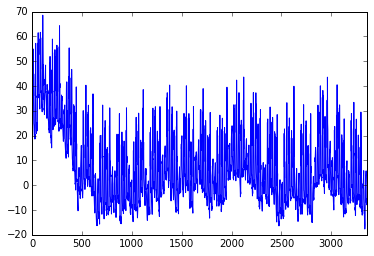

In [17]:
# Graf pro teplotu v mistnosti jiho-zapad
data['Temp-JZ-Temperature'].plot()
plt.show()

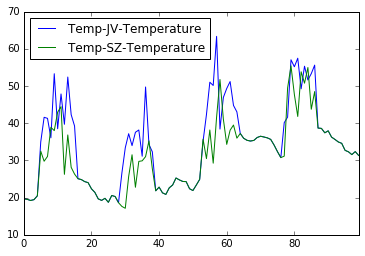

In [18]:
## Je mozne pouzit vyber podmnoziny dat, jak jsme se ho naucili v predchozi casti
data[0:100][['Temp-JV-Temperature', 'Temp-SZ-Temperature']].plot()
plt.show()

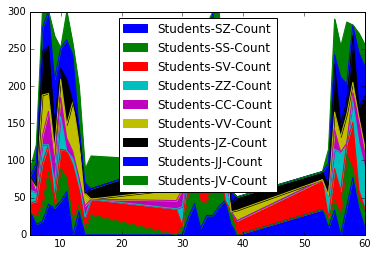

In [19]:
data_active[
    ['Students-SZ-Count', 'Students-SS-Count', 'Students-SV-Count',
     'Students-ZZ-Count', 'Students-CC-Count', 'Students-VV-Count',
     'Students-JZ-Count', 'Students-JJ-Count', 'Students-JV-Count'
    ]
][0:30].plot.area()

plt.show()

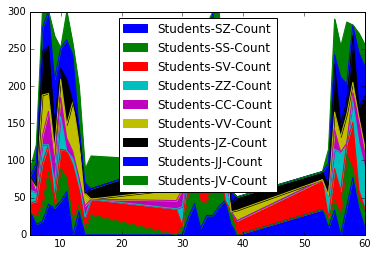

In [20]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
# Existuje vice zpusobu, jak udelat stejnou vec
data_active[
    ['Students-SZ-Count', 'Students-SS-Count', 'Students-SV-Count',
     'Students-ZZ-Count', 'Students-CC-Count', 'Students-VV-Count',
     'Students-JZ-Count', 'Students-JJ-Count', 'Students-JV-Count'
    ]
][0:30].plot(
    kind='area',
)
plt.show()


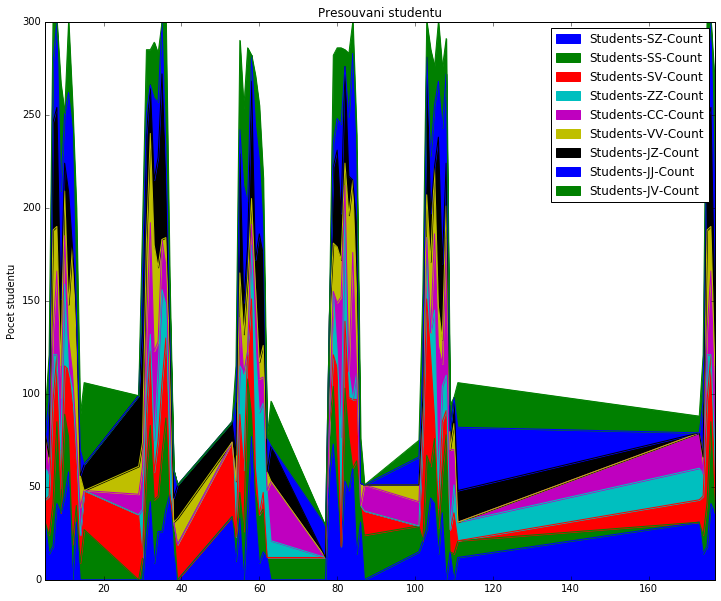

In [28]:
students = data_active[
    ['Students-SZ-Count', 'Students-SS-Count', 'Students-SV-Count',
     'Students-ZZ-Count', 'Students-CC-Count', 'Students-VV-Count',
     'Students-JZ-Count', 'Students-JJ-Count', 'Students-JV-Count'
    ]
][0:60]

#students = students.divide(students.sum(axis=1), axis=0)

ax = students.plot(
    kind='area',
    stacked=True,
    figsize=(12, 10),
    title="Presouvani studentu",    
)
ax.set_ylabel('Pocet studentu')
ax.margins(0, 0) # Set margins to avoid "whitespace"

plt.show()

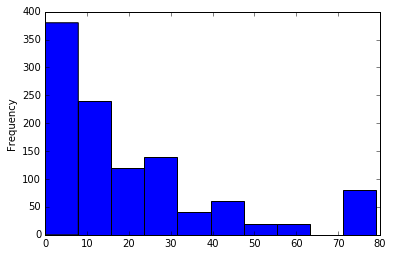

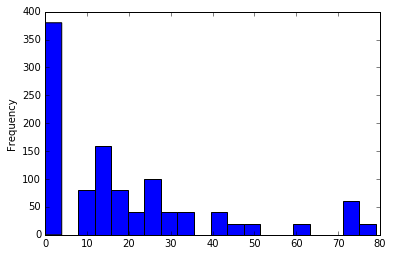

In [304]:
# Muzeme se podivat na histogram poctu studentu ve tride center-center
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist
data_active["Students-CC-Count"].plot.hist()
plt.show()

data_active["Students-CC-Count"].plot.hist(bins=20)
plt.show()

## Korelace

Ted se podivame, jak mezi sebou jednotlive hodnoty koreluji - https://cs.wikipedia.org/wiki/Korelace

Hodnota korelačního koeficientu −1 značí zcela nepřímou závislost (antikorelaci), tedy čím více se zvětší hodnoty v první skupině znaků, tím více se zmenší hodnoty v druhé skupině znaků, např. vztah mezi uplynulým a zbývajícím časem. Hodnota korelačního koeficientu +1 značí zcela přímou závislost, např. vztah mezi rychlostí bicyklu a frekvencí otáček kola bicyklu. Pokud je korelační koeficient roven 0 (nekorelovanost), pak mezi znaky není žádná statisticky zjistitelná lineární závislost. Je dobré si uvědomit, že i při nulovém korelačním koeficientu na sobě veličiny mohou záviset, pouze tento vztah nelze vyjádřit lineární funkcí, a to ani přibližně.

In [265]:
# Ted se podivame, ktere sloupecky koreluji s hlukem v mistnosti jiho-vychod?
# Nejaky napad, proc tomu tak je?
data.corr()["Noise-JV-Noise"].sort_values()

D_BirdsTotal-Count        -0.720407
Birds-JV-Count            -0.711816
Birds-JZ-Count            -0.532707
Birds-VV-Count            -0.517702
Birds-SZ-Count            -0.506303
Birds-JJ-Count            -0.495515
Birds-SS-Count            -0.469610
Birds-SV-Count            -0.449780
D-Birds-JV-Count-6        -0.442080
D-D_BirdsTotal-Count-6    -0.423760
Birds-ZZ-Count            -0.400605
D-Birds-JV-Count-3        -0.348468
D-D_BirdsTotal-Count-3    -0.317710
D-Birds-VV-Count-6        -0.304931
D-Birds-JZ-Count-6        -0.294824
D-Birds-JV-Count-1        -0.285819
D-Birds-SV-Count-6        -0.273328
D-Birds-SS-Count-6        -0.270347
D-Birds-SZ-Count-6        -0.267398
D-Birds-JJ-Count-6        -0.260423
D-Birds-ZZ-Count-6        -0.227599
D-Birds-JZ-Count-3        -0.217468
D-D_BirdsTotal-Count-1    -0.188474
D-Birds-SZ-Count-3        -0.180001
D-Birds-VV-Count-3        -0.146549
D-Birds-SV-Count-3        -0.143884
D-Birds-ZZ-Count-3        -0.123138
D-Birds-JJ-Count-3        -0

In [266]:
# Ted se podivame, jak vypada korelace, kdyz tam byli studenti
# Proc se to tak zmenilo?
data_active.corr()["Noise-JV-Noise"].sort_values()

Birds-JV-Count              -0.779388
D_BirdsTotal-Count          -0.615414
D-Birds-JV-Count-6          -0.588770
D-Birds-JV-Count-3          -0.562018
D-Birds-JV-Count-1          -0.520004
D-D_BirdsTotal-Count-6      -0.427782
D-D_BirdsTotal-Count-3      -0.415182
D-D_BirdsTotal-Count-1      -0.316495
D-Birds-VV-Count-6          -0.306312
Birds-VV-Count              -0.295144
D-Birds-JZ-Count-3          -0.294040
Birds-JZ-Count              -0.270087
D-Birds-SZ-Count-3          -0.251073
D-Birds-JZ-Count-6          -0.244526
Birds-JJ-Count              -0.237474
D-Birds-SV-Count-6          -0.230223
Birds-SZ-Count              -0.223779
D-Temp-ZZ-Temperature-1     -0.215685
D-Birds-SS-Count-6          -0.208777
D-Birds-SZ-Count-6          -0.205798
D-Temp-SV-Temperature-1     -0.203566
D-OutTempJ-Temperature-1    -0.199232
D-Students-SV-Count-1       -0.190524
D-Birds-JJ-Count-6          -0.190117
D-Birds-VV-Count-3          -0.182929
D-Noise-SV-Noise-1          -0.180956
D-Birds-SV-C

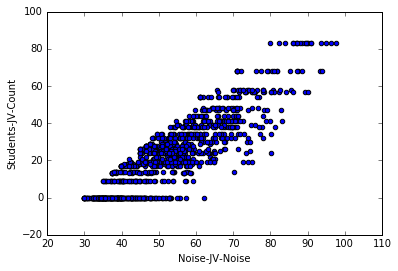

In [267]:
# Nyni si muzeme data vizualizovat
# Nejdriv si vygenerujeme graf zavislosti mezi hlukem v jiho vychodni mistnosti a poctem studentu uvnitr
data_active.plot.scatter(x='Noise-JV-Noise', y='Students-JV-Count')
plt.show()

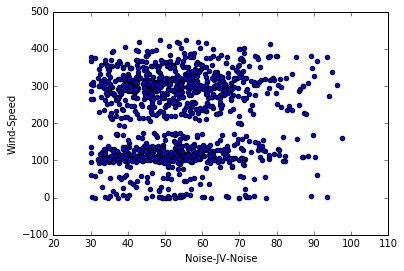

In [268]:
# Potom mezi hlukem v jiho vychodni mistnosti a rychlosti vetru
data_active.plot.scatter(x='Noise-JV-Noise', y='Wind-Speed')
plt.show()

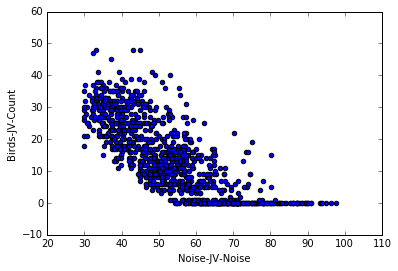

In [269]:
# A na zaver mezi hlukem v jiho vychodni mistnosti a poctem ptaku na parapetu
data_active.plot.scatter(x='Noise-JV-Noise', y='Birds-JV-Count')
plt.show()

## Strojove uceni/Umela inteligence

Pokud mame nasbirana nejaka data, muzeme s nimi provadet celou radu veci. Jsou 3 zakladni veci, ktere se muzeme snazit odhadovat.

* Regrese - snazime se uhadnout ciselnou hodnotu. Napriklad na zaklade technickych parametru se muzeme snazit odhadnout, kolik by mel stat dany mobilni telefon. V nasem pripade se muzeme snazit odhadovat teplotu nebo pocet studentu.
* Klasifikace - snazime se uhadnout, do ktere tridy dana vec patri. Na zaklade technickych parametru se muzeme snazit odhadnout, jestli se jedna o mobilni telefon nebo tablet. V nasem pripade se muzeme snazit odhadnout, ktery je den v tydnu, pripadne jestli jsou studenti ve skole.

Pro oba vyse zminene pripady potrebujeme nekoho, kdo nam nejdrive rekne, jaka ma byt spravna hodnota. Pokud nam nikdo spravne odpovedi nerekne, tak muzeme zkusit klustrovani, kde data rozdelime do nekolika skupin. U vyse zminenych prikladu by nam mely vzniknout minimalne 2 ruzne skupiny, kde v jedne skupine by byly mobilni telefony a v druhe tablety. V nasem pripade bychom meli byt schopni rozdelit jednotlive zaznamy podle toho, jestli studenti byli ve skole nebo ne.

A protoze nechceme podvadet, tak budeme pracovat s podmnozinou sloupcu.

In [30]:
# opravime data, aby se nam s nimi lepe pracovalo
NON_NUMERICAL_COLUMNS = ["TS", "TS.1", 'D_DayHour', 'D_DayOfWeek', 'D_HourOfDay']

means = {k: v for k, v in data_active.mean().items()}
data_active = data_active.fillna(value=means)

## Regrese



In [272]:
from sklearn.model_selection import train_test_split
# Generate the training set.  Set random_state to be able to replicate results.
train = data_active.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = data_active.loc[~data_active.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(880, 178)
(220, 178)


In [274]:
data_active[['D_DayOfWeek', 'D_DayHour', 'D_StudentsTotal-Count']]
data_active[:120][['D_DayOfWeek', 'D_DayHour', 'D_StudentsTotal-Count']]

,D_DayOfWeek,D_DayHour,D_StudentsTotal-Count
5,Po,Po-6h,88.0
6,Po,Po-7h,121.0
7,Po,Po-8h,300.0
8,Po,Po-9h,300.0
9,Po,Po-10h,267.0
10,Po,Po-11h,251.0
11,Po,Po-12h,300.0
12,Po,Po-13h,256.0
13,Po,Po-14h,200.0
14,Po,Po-15h,88.0


,D_DayOfWeek,D_DayHour,D_StudentsTotal-Count
10,Po,Po-11h,251.0
11,Po,Po-12h,300.0
12,Po,Po-13h,256.0
13,Po,Po-14h,200.0
14,Po,Po-15h,88.0
15,Po,Po-16h,106.0
16,Po,Po-17h,0.0
17,Po,Po-18h,0.0
18,Po,Po-19h,0.0
19,Po,Po-20h,0.0


In [280]:
# Get all the columns from the dataframe.
columns = data_active.columns.tolist()
# Filter the columns to remove ones we don't want.
# columns = [c for c in columns if c not in ["Count-SV-Count", "INDEX", "TS", "TS.1", "D_DayOfWeek", "D_HourOfDay"]]

columns = [
    "Noise-VV-Noise", 
    "Noise-SV-Noise", 
    "Temp-SV-Temperature", 
    "Temp-VV-Temperature", 
    "Wind-Direction", 
    "Wind-Speed",
    #"OutTempJ-Temperature",
    #"OutTempS-Temperature"
]
# Store the variable we'll be predicting on.
target = "Students-SV-Count"

In [281]:
# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [282]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

71.250955694339723

In [283]:
from sklearn import datasets, svm, metrics
columns = [
    "Noise-SZ-Noise",
    "Noise-SS-Noise",
    "Noise-SV-Noise",
    "Noise-ZZ-Noise",
    "Noise-CC-Noise",
    "Noise-VV-Noise",
    "Noise-JZ-Noise",
    "Noise-JJ-Noise",
    "Noise-JV-Noise",
    
    "D-Noise-SZ-Noise-1",
    "D-Noise-SS-Noise-1",
    "D-Noise-SV-Noise-1",
    "D-Noise-ZZ-Noise-1",
    "D-Noise-CC-Noise-1",
    "D-Noise-VV-Noise-1",
    "D-Noise-JZ-Noise-1",
    "D-Noise-JJ-Noise-1",
    "D-Noise-JV-Noise-1",    
    
    "D-Noise-SZ-Noise-3",
    "D-Noise-SS-Noise-3",
    "D-Noise-SV-Noise-3",
    "D-Noise-ZZ-Noise-3",
    "D-Noise-CC-Noise-3",
    "D-Noise-VV-Noise-3",
    "D-Noise-JZ-Noise-3",
    "D-Noise-JJ-Noise-3",
    "D-Noise-JV-Noise-3",     
    
    "Temp-SZ-Temperature",
    "Temp-SS-Temperature",
    "Temp-SV-Temperature",
    "Temp-ZZ-Temperature",
    "Temp-CC-Temperature",
    "Temp-VV-Temperature",
    "Temp-JZ-Temperature",
    "Temp-JJ-Temperature",
    "Temp-JV-Temperature",   
    
    "OutNoiseZ-Noise",
    "Wind-Direction", 
    "Wind-Speed",
    "OutTempJ-Temperature",
    "OutTempS-Temperature"
]
#target = "D_DayHour"
target = "D_DayOfWeek"
#target = "D_HourOfDay"

classifier = svm.SVC(gamma=0.001)
classifier.fit(train[columns], train[target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [284]:
# Now predict the value of the digit on the second half:
expected = test[target]
predicted = classifier.predict(test[columns])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

         Ct       0.86      0.84      0.85        43
         Pa       1.00      0.60      0.75        45
         Po       0.96      0.68      0.79        40
         St       0.96      0.52      0.68        48
         Ut       0.45      1.00      0.62        44

avg / total       0.85      0.72      0.74       220


Confusion matrix:
[[36  0  0  0  7]
 [ 3 27  0  0 15]
 [ 0  0 27  1 12]
 [ 3  0  1 25 19]
 [ 0  0  0  0 44]]
